## Workshop Notebook

A notebook for creating graphs and interacting with implementation code in a more interactive way. Use at your convenience.

In [1]:
from bandit import *

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def plot(fns:list, params:list, labels:list, title:str="Plot"):
    assert len(fns) == len(params) == len(labels), "Number of functions, the number of function parameter collections, and the number of their labels must be the same."
    for i, fn in enumerate(fns):
        print(f"{params[i]}")

        runs = fn(**params[i])
        plt.plot(runs, label=labels[i])

    plt.xlabel("step")
    plt.ylabel("average reward over 100 runs at step")
    plt.legend(labels)
    plt.title(title)
    plt.show()

{'strategy': 'eps-greedy', 'arms': [<bandit.PeerArm object at 0x7f256cde7670>, <bandit.PeerArm object at 0x7f256cde76d0>, <bandit.PeerArm object at 0x7f256cde7790>, <bandit.PeerArm object at 0x7f256cde7850>, <bandit.PeerArm object at 0x7f256cde7910>], 'eps': 0.1}
{'strategy': 'eps-first', 'arms': [<bandit.PeerArm object at 0x7f256cde7670>, <bandit.PeerArm object at 0x7f256cde76d0>, <bandit.PeerArm object at 0x7f256cde7790>, <bandit.PeerArm object at 0x7f256cde7850>, <bandit.PeerArm object at 0x7f256cde7910>], 'eps': 0.1}
{'strategy': 'eps-decreasing', 'arms': [<bandit.PeerArm object at 0x7f256cde7670>, <bandit.PeerArm object at 0x7f256cde76d0>, <bandit.PeerArm object at 0x7f256cde7790>, <bandit.PeerArm object at 0x7f256cde7850>, <bandit.PeerArm object at 0x7f256cde7910>], 'eps': 0.1}


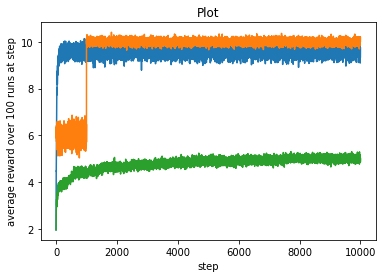

In [3]:
peer_arms = [PeerArm(2, 1), PeerArm(4, 1), PeerArm(6, 1), PeerArm(8, 1), PeerArm(10, 1)]

plot(
    [epsilon, epsilon, epsilon], 
    [dict(strategy="eps-greedy", arms=peer_arms, eps=0.1), 
    dict(strategy="eps-first", arms=peer_arms, eps=0.1), 
    dict(strategy="eps-decreasing", arms=peer_arms, eps=0.1)], 
    ["eps-g=0.1", "eps-f=0.1", "eps-d=0.1"])